# Import dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gudhi as gd
import kmapper as km

import sklearn
import networkx

import seaborn
import pandas

# Generate dataset

In [2]:
from gudhi.datasets.generators import points
data = points.torus(n_samples=100, dim=1, sample='random')

rng = np.random.default_rng(seed=0)
data = data + rng.random(data.shape)*0.3

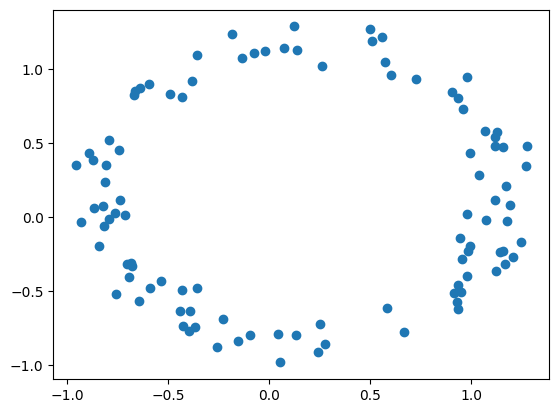

In [3]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(data[:,0], data[:,1])
plt.show()

In [4]:
plt.close()

# Compute Vietoris-Rips Complex 

In [5]:
rc = gd.RipsComplex(points=data)
st = rc.create_simplex_tree(max_dimension=2)

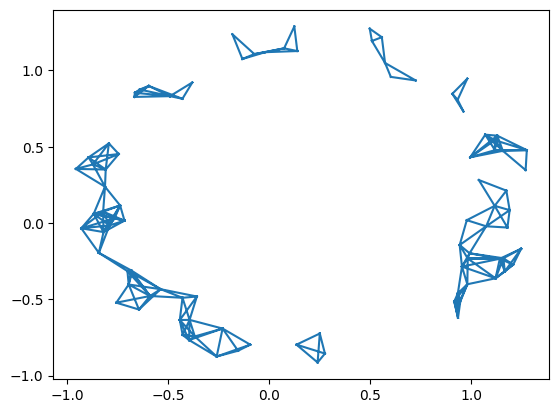

In [6]:
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3 and s[1]<0.2])
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.triplot(data[:,0], data[:,1], triangles=triangles)
plt.show()

In [7]:
plt.close()

## Compute Persistent Homology

In [8]:
pd = st.persistence()

/home/julius/pyenvs/tda/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

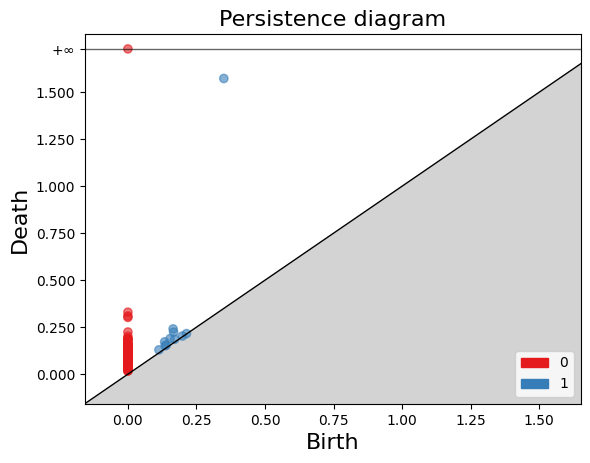

In [9]:
gd.plot_persistence_diagram(pd)

# Compute Mapper

In [10]:
mapper = km.KeplerMapper(verbose=1)
projected_data = data[:,1]

graph = mapper.map(projected_data,data,
                      cover=km.Cover())

KeplerMapper(verbose=1)
Mapping on data shaped (100, 2) using lens shaped (100,)

Creating 10 hypercubes.

Created 16 edges and 16 nodes in 0:00:00.014057.


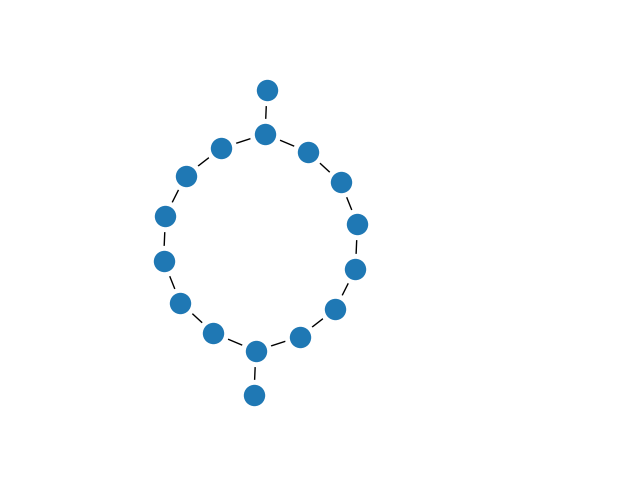

In [11]:
%matplotlib widget

km.draw_matplotlib(graph, layout='kk')


In [12]:
plt.close()